In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

% matplotlib inline



*  Nutrient_g is in grams
* Nutrient_mg is in milligrams
* Nutrient_mcg is in micrograms
* Nutrient_USRDA is in percentage of US Recommended Daily Allows (e.g. 0.50 is 50%)



In [ ]:
#importing nutrition data from data.world
df= pd.read_csv('https://query.data.world/s/tnddthomnw7iankjcmu55arkxreoae')


In [ ]:
df_target=df[['FoodGroup']]

In [ ]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
df[['FoodGroup']].value_counts()

FoodGroup                          
Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, an

In [ ]:
#removing name, manufacturer name, scientific name etc
df.drop(columns=df.columns[0:7], 
        axis=1, 
        inplace=True)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
features=list(df.columns.values.tolist())

In [ ]:
#import plotly.express as px

#fig = px.scatter_matrix(
#    df,
#    dimensions=features,
#    color="FoodGroup"
#)

#fig.show()



####Data Exploration

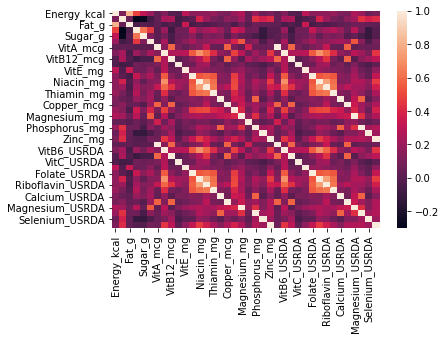

In [ ]:
#correlation - vizualization
#round(df.corr(),2)
sns.heatmap(round(df.corr(),2))

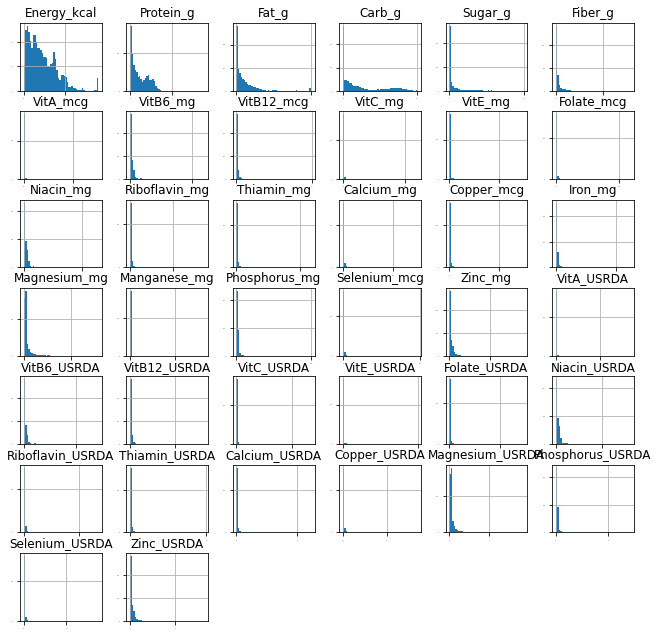

In [ ]:
#explore data distribution

ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))
#looks skewed, zero-inflated. consider transforming the dist.

####data transformation

In [ ]:
#lets try to address the skewness with boxcox transform(it penalizes the larger gaps and increases the smaller values)
from scipy.stats import boxcox
#add 1 because data must be positive (we have many zeros)
df = df.add(1) 
df_trans = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_trans["%s_TF" % i] = boxcox(df.loc[:, i])[0]

In [ ]:
type(df_trans)

pandas.core.frame.DataFrame

In [ ]:
#standardize -  scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean= 0 and sd=1
from sklearn.preprocessing import StandardScaler
df_trans=StandardScaler().fit_transform(df_trans) #to address the difference in scales of different columns

#btw normalize(not using here) : scales each input variable separately to the range 0-1, in floating-point values

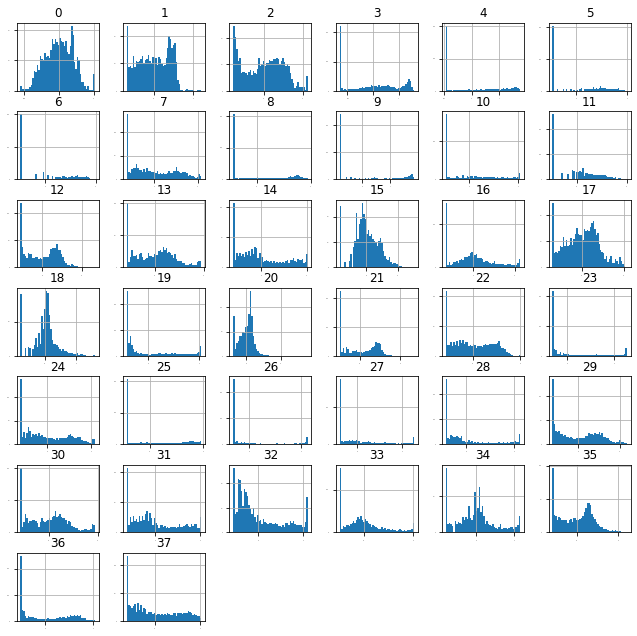

In [ ]:
ax = pd.DataFrame(df_trans).hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [ ]:
type(df_trans)

numpy.ndarray

###PCA

In [ ]:
pca = PCA()
pca.fit(df_trans)
scores=pca.transform(df_trans)

In [ ]:
type(pca)

sklearn.decomposition._pca.PCA

##Analyse PCA results:

In [ ]:
explained_variance_ratio=pca.explained_variance_ratio_


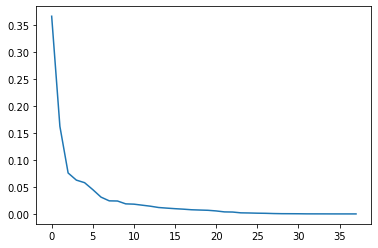

In [ ]:
plt.plot(explained_variance_ratio)

In [ ]:
#cumulative varience
print(pca.explained_variance_ratio_[:1].sum())
print(pca.explained_variance_ratio_[:3].sum())
print(pca.explained_variance_ratio_[:5].sum())
print(pca.explained_variance_ratio_[:7].sum())
print(pca.explained_variance_ratio_[:10].sum())
#now on we shall consider the first 5 Principal Components

0.36624703796429975
0.6043086236309444
0.7248346083420609
0.8009351829004385
0.8677045160276271


In [ ]:
scores_df = pd.DataFrame(scores[:,:5], columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
scores_df

,PC1,PC2,PC3,PC4,PC5
0,-4.025888,-0.942056,-1.592030,4.468520,-3.354255
1,-3.942871,-0.754841,-1.521825,4.302591,-3.434445
2,-5.290475,-1.357903,-1.052281,4.616716,-3.346692
3,2.639791,-0.663603,-2.178309,2.453630,-1.633428
4,1.945116,-0.707578,-2.121062,2.670811,-2.248961
...,...,...,...,...,...
8613,3.763060,-1.808249,-2.693326,1.861289,-2.850461
8614,0.426122,-2.598616,-0.983908,-1.952326,-1.163661
8615,-4.428565,0.202996,2.353612,0.379839,0.991728
8616,2.312451,-0.188855,-2.096014,-0.985987,-3.865210


In [ ]:
#loadings:
loadings = pca.components_.T
loadings=loadings[:,:5]
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5'])
df_loadings

,PC1,PC2,PC3,PC4,PC5
0,0.116920,0.015598,0.318748,0.267579,-0.167973
1,0.210767,-0.166476,0.038761,-0.049601,-0.061935
2,0.110813,-0.103117,0.191112,0.303125,-0.229280
3,-0.021959,0.313060,0.243530,0.099643,0.085248
4,-0.051578,0.218822,0.100477,0.267015,0.088070
5,-0.000431,0.296948,0.198729,0.002991,0.068272
6,0.045249,0.110278,-0.378720,0.240250,-0.010535
7,0.209425,-0.052291,-0.105675,-0.029162,0.173905
8,0.167667,-0.219768,-0.185541,0.091110,0.072059
9,-0.045752,0.222351,-0.301647,-0.064178,0.233224


In [ ]:
#Preparing the cumulative variance & explained varience data for plots
explained_variance_ratio=explained_variance_ratio[0:5]
explained_variance_ratio = np.insert(explained_variance_ratio, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance_ratio, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
pc_df = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
pc_df

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.366247,0.366
2,PC2,0.162206,0.528
3,PC3,0.075855,0.604
4,PC4,0.062629,0.667
5,PC5,0.057897,0.725


###scree plot:

In [ ]:
# https://plotly.com/python/bar-charts/
import plotly.express as px
fig = px.bar(pc_df, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [ ]:
#Explained Variance + Cumulative Variance
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=pc_df['PC'],
        y=pc_df['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=pc_df['PC'],
        y=pc_df['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

###Scores plot

In [ ]:
scores_df['Target']=df_target

In [ ]:
import plotly.express as px
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color='Target')

fig.show()

###loding score plot

In [ ]:
loadings_label = df_loadings.index

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()